C:\Users\jobha\anaconda3\envs\tpot\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
C:\Users\jobha\anaconda3\envs\tpot\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
C:\Users\jobha\anaconda3\envs\tpot\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
C:\Users\jobha\anaconda3\envs\tpot\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot: >

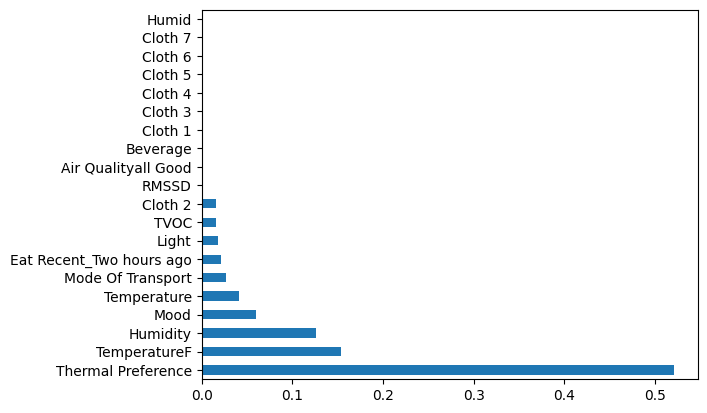

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from tpot.builtins import StackingEstimator

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('stripped.csv')
features = tpot_data.drop('Thermal Comfort', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['Thermal Comfort'], random_state=None)

# Average CV score on the training set was: 0.7111917725347852
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=SGDClassifier(alpha=0.0, eta0=0.1, fit_intercept=False, l1_ratio=0.0, learning_rate="invscaling", loss="modified_huber", penalty="elasticnet", power_t=100.0)),
    MinMaxScaler(),
    RFE(estimator=ExtraTreesClassifier(criterion="entropy", max_features=0.05, n_estimators=100), step=0.6000000000000001),
    DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=3, min_samples_split=8)
)

exported_pipeline.fit(training_features, training_target)

results = exported_pipeline.predict(testing_features)

tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=3, min_samples_split=8).fit(training_features, training_target)
(pd.Series(tree.feature_importances_, index=features.columns)
   .nlargest(20)
   .plot(kind='barh'))